


# Vamos encher o carrinho!

# Introdução

O Instacart é uma plataforma de entrega de supermercado onde os clientes podem fazer um pedido no supermercado e depois receber sua compra, semelhante ao funcionamento do Uber Eats e do iFood. O conjunto de dados que fornecemos foi modificado a partir do original. Reduzimos o tamanho dele para que seus cálculos sejam executados mais rapidamente e incluímos valores ausentes e duplicados. Também tivemos o cuidado de preservar as distribuições dos dados originais quando fizemos as alterações.

Você precisa completar três etapas. Para cada uma delas, escreva uma breve introdução descrevendo como você pretende concluir a etapa e justifique suas decisões em parágrafos explicativos a medida que você avança na solução. Escreva também uma conclusão para resumir suas conclusões e escolhas.



## Dicionário de dados

Há cinco tabelas no conjunto de dados, e você vai precisar usar todas elas para pré-processar seus dados e fazer AED. Abaixo está um dicionário que lista as colunas de cada tabela e descreve os dados contidos nelas.

- `instacart_orders.csv`: cada linha corresponde a um pedido no aplicativo da Instacart
    - `'order_id'`: é o número que identifica cada pedido de forma exclusiva
    - `'user_id'`: é o número de identificação exclusivo da conta de cada cliente
    - `'order_number'`: é o número de vezes que o cliente fez um pedido
    - `'order_dow'`: é o dia da semana em que o pedido foi feito (0 é domingo)
    - `'order_hour_of_day'`: é a hora do dia em que o pedido foi feito
    - `'days_since_prior_order'`: é o número de dias desde que o cliente fez seu pedido anterior




- `products.csv`: cada linha corresponde a um produto exclusivo que os clientes podem comprar
    - `'product_id'`: é o número de identificação unívoco de cada produto
    - `'product_name'`: é o nome do produto
    - `'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    - `'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado




-	`order_products.csv`: cada linha corresponde a um item incluído em um pedido
    -	`'order_id'`: é o número que identifica cada pedido de forma exclusiva
    -	`'product_id'`: é o número de identificação exclusivo de cada produto
    -	`'add_to_cart_order'`: é a ordem sequencial em que cada item foi colocado no carrinho
    -	`'reordered'`: 0 se o cliente nunca comprou o produto antes, 1 se já o comprou




-	`aisles.csv`
    -	`'aisle_id'`: é o número de identificação exclusivo de cada categoria de corredor do supermercado
    -	`'aisle'`: é o nome do corredor



-	`departments.csv`
    -	`'department_id'`: é o número de identificação exclusivo de cada categoria de departamento do supermercado
    -	`'department'`: é o nome do departamento


# Etapa 1. Visão geral dos dados

Leia os arquivos de dados (/datasets/instacart_orders.csv, /datasets/products.csv, /datasets/aisles.csv, /datasets/departments.csv e /datasets/order_products.csv) com `pd.read_csv()` usando os parâmetros apropriados para fazer isso corretamente. Verifique as informações para cada DataFrame criado.


## Plano de solução

Escreva aqui seu plano para a Etapa 2. Visão geral dos dados

In [2]:
# Importe as bibliotecas
import pandas as pd

In [3]:
# leia os conjuntos de dados em DataFrames
df_orders= pd.read_csv('/datasets/instacart_orders.csv', sep=';')
df_products= pd.read_csv('/datasets/products.csv', sep=';')
df_aisles= pd.read_csv('/datasets/aisles.csv', sep=';')
df_departments= pd.read_csv('/datasets/departments.csv', sep=';')
df_order_products= pd.read_csv('/datasets/order_products.csv', sep=';')

In [4]:
# imprima as informações sobre o DataFrame
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
# imprima as informações sobre o DataFrame
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
# imprima as informações sobre o DataFrame
df_aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
# imprima as informações sobre o DataFrame
df_departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [8]:
# imprima as informações sobre o DataFrame
df_order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 1. Visão geral dos dados
Pode-se perceber que os arquivos estão separados por ';' e não ','. Além disso, as planilhas:orders.csv, df_products, e order_products.csv estão com valores nulos faltantes. 

# Etapa 2. Preparação de dados

Faça o pré-processamento dos dados da seguinte maneira:

-	Verifique e corrija os tipos de dados (por exemplo, certifique-se de que as colunas de ID sejam números inteiros)
-	Identifique e preencha valores ausentes
-	Identifique e remova valores duplicados

Certifique-se de explicar que tipos de valores ausentes e duplicados você encontrou, como você os preencheu ou removeu, por que escolheu esses métodos e por que você acha que esses valores ausentes e duplicados estavam presentes no conjunto de dados.

## Plano de solução

Escreva aqui seu plano para a Etapa 2. Preparação de dados
1. Preencher com 0 os nulos em days_since_prior_order, pois faz sentido para aqueles que são o primeiro pedido. Depois disso converter para int; 
2. Investigar os nulos em product_name e remover eles se necessário; 
3. Os nulos em add_to_cart_order remover e depois converter para int; 
4. Remover os duplicados para evitar distorções estatísticas. 

## Encontre e remova valores duplicados (e descreva por que você está fazendo suas escolhas)

### DataFrame `instacart_orders`

In [9]:
# Verificar se há pedidos duplicados

df_orders.duplicated().sum()



15

Há linhas duplicadas? Se sim, o que elas têm em comum? Sim. order_dow e order_hours_of_day são iguais, aconteceram na quarta feira as 2h 

In [10]:
df_orders[df_orders.duplicated()]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
145574,794638,50898,24,3,2,2.0
223105,2160484,107525,16,3,2,30.0
230807,1918001,188546,14,3,2,16.0
266232,1782114,106752,1,3,2,NaN
273805,1112182,202304,84,3,2,6.0
284038,2845099,31189,11,3,2,7.0
311713,1021560,53767,3,3,2,9.0
321100,408114,68324,4,3,2,18.0
323900,1919531,191501,32,3,2,7.0
345917,2232988,82565,1,3,2,NaN


In [11]:
# Com base nas suas conclusões,

# verifique todos os pedidos feitos às 2h da manhã nas quartas-feiras

pedidos_quarta_2h = df_orders[
    (df_orders['order_hour_of_day'] == 2) & (df_orders['order_dow'] == 3)
]

# Visualizar o resultado
print(pedidos_quarta_2h)


        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

O que esse resultado quer dizer? Que 121 pedidos foram feitos às 2h da manhã de uma quarta-feira.

In [12]:
# Remova pedidos duplicados
df_orders = df_orders.drop_duplicates()


In [13]:
# Verifique as linhas duplicadas mais uma vez
df_orders.duplicated().sum()

0

In [14]:
# Verifique novamente apenas os IDs de pedidos duplicados
df_orders.duplicated(subset='order_id').sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.
Após a verificação inicial, identifiquei 15 linhas duplicadas no DataFrame df_orders, onde todas as colunas estavam exatamente iguais. Essas duplicatas foram removidas utilizando o método drop_duplicates(). Em seguida, verifiquei novamente a presença de duplicatas e confirmei que nenhuma linha duplicada permaneceu.

Além disso, realizei uma checagem específica para valores duplicados na coluna order_id, que deve conter apenas identificadores únicos. A verificação mostrou que não havia order_id duplicados após a limpeza — o que garante que cada pedido está representado apenas uma vez no conjunto de dados.

### DataFrame `products`

In [15]:
# Verifique se há linhas completamente duplicadas
df_products.duplicated().sum()


0

In [16]:
# Verifique apenas IDs dos produtos duplicados
df_products.duplicated(subset='product_id').sum()


0

In [17]:
# Verifique apenas nomes de produtos duplicados (converta os nomes para minúsculas para uma comparação melhor)
df_products['product_name']= df_products['product_name'].str.lower()
df_products.duplicated(subset= 'product_name').sum()

1361

In [18]:
# Verifique os nomes de produtos duplicados que não estão faltando
df_products[df_products['product_name'].notna()].duplicated(subset= 'product_name').sum()

104

Descreva brevemente suas conclusões e o que você fez com elas. Conseguimos visualizar que nomes de produtos duplicados são 1361 e nomes de produtos que não estão preenchidos com NaN são 104. 

### DataFrame `departments`

In [19]:
# Verifique se há linhas completamente duplicadas
df_departments.duplicated().sum()

0

In [20]:
# Verifique apenas se há IDs dos produtos duplicados
df_departments.duplicated(subset= 'department_id').sum()

0

Descreva brevemente suas conclusões e o que você fez com elas. Não temos linhas duplicadas e nem IDs.

### DataFrame `aisles`

In [21]:
# Verifique se há linhas completamente duplicadas
df_aisles.duplicated().sum()

0

In [22]:
# Verifique apenas se há IDs dos produtos duplicados
df_aisles.duplicated(subset= 'aisle_id').sum()

0

Descreva brevemente suas conclusões e o que você fez com elas. Não temos linhas duplicadas e nem IDs.

### DataFrame `order_products`

In [23]:
# Verifique se há linhas completamente duplicadas
df_order_products.duplicated().sum()

0

In [24]:
# Verifique mais uma vez se há outros casos complicados de duplicados
df_order_products.duplicated(subset= ['order_id', 'product_id']).sum()

0

Descreva brevemente suas conclusões e o que você fez com elas. Não temos linhas duplicadas e nem IDs.

## Encontre e remova valores ausentes


Ao processarmos valores duplicados, observamos que também temos valores ausentes que precisamos investigar nas seguintes colunas:

*	A coluna `'product_name'` da tabela products.
*	A coluna `'days_since_prior_order'` da tabela orders.
*	A coluna `'add_to_cart_order'` da tabela order_products.


### DataFrame `products`

In [25]:
# Encontre valores ausentes na coluna 'product_name'
df_products#['product_name'].isnull().sum()

,product_id,product_name,aisle_id,department_id
0,1,chocolate sandwich cookies,61,19
1,2,all-seasons salt,104,13
2,3,robust golden unsweetened oolong tea,94,7
3,4,smart ones classic favorites mini rigatoni wit...,38,1
4,5,green chile anytime sauce,5,13
...,...,...,...,...
49689,49690,high performance energy drink,64,7
49690,49691,original pancake & waffle mix,130,14
49691,49692,organic instant oatmeal light maple brown sugar,130,14
49692,49693,spring water body wash,127,11


Descreva brevemente suas conclusões. Temos 1258 valores nulos na coluna 'product_name'

In [26]:
# Todos os nomes de produtos ausentes estão associados com o corredor de ID 100?
df_products[df_products['product_name'].isna()]['aisle_id'].unique()

array([100])

Descreva brevemente suas conclusões. Todos os nomes de produtos ausentes estão associados com o corredor de ID 100

In [27]:
# Todos os nomes de produtos ausentes estão associados com o departamento de ID 21?
df_products[df_products['product_name'].isna()]['department_id'].unique()

array([21])

Descreva brevemente suas conclusões. Todos os nomes de produtos ausentes estão associados com o corredor de ID 21

In [28]:
# Use as tabelas department e aisle para verificar os dados do corredor com ID 100 e do departamento com ID 21.
df_aisles[df_aisles['aisle_id'] == 100]
df_departments[df_departments['department_id'] == 21]

,department_id,department
20,21,missing


Descreva brevemente suas conclusões. Os dois corredores estão "missing"

In [29]:
# Preencha nomes de produtos ausentes com 'Unknown'
df_products['product_name'].fillna('Unknown', inplace=True)
#ou
df_products['product_name']= df_products['product_name'].fillna('Unknown') #reatribuição

In [30]:
#checar se deu certo
df_products['product_name'].isnull().sum()

0

Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `orders`

In [31]:
# Encontre os valores ausentes
df_orders.isnull().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [32]:
# Há valores ausentes para os clientes que não estão fazendo o primeiro pedido?
df_orders[df_orders['days_since_prior_order'].isnull()]['order_number'].unique()

array([1])

Descreva brevemente suas conclusões e o que você fez com elas.

### DataFrame `order_products`

In [33]:
# Encontre os valores ausentes
df_order_products.isnull().sum()

order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [34]:
# Quais são os valores mínimo e máximo dessa coluna?
df_order_products['add_to_cart_order'].agg(['min', 'max'])

min     1.0
max    64.0
Name: add_to_cart_order, dtype: float64

Descreva brevemente suas conclusões.

In [35]:
# Salve todos os IDs dos pedidos com pelo menos um valor ausente em 'add_to_cart_order'
ids_missing= df_order_products[df_order_products['add_to_cart_order'].isna()]['order_id'].drop_duplicates().to_list()
ids_missing[:5]

[2449164, 1968313, 2926893, 1717990, 1959075]

In [36]:
# Todos os pedidos com valores ausentes contêm mais de 64 produtos?
# Agrupe os pedidos com dados ausentes por ID de pedido
# Conte o número de 'product_id' em cada pedido e verifique o valor mínimo da contagem
df_order_products[df_order_products['order_id'].isin(ids_missing)].groupby('order_id')['product_id'].count().min()

65

Descreva brevemente suas conclusões.

In [37]:
# Substitua valores ausentes na coluna 'add_to_cart_order' por 999 e converta a coluna para o tipo integer
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].fillna(999).astype(int)

<div class="alert alert-block alert-success">

<b>Comentário: </b> <a class="tocSkip"></a>

A etapa de processamento de dados foi realizada corretamente! Parabéns
</div>

Descreva brevemente suas conclusões e o que você fez com elas.

## Conclusões

Escreva aqui suas conclusões intermediárias da Etapa 2. Preparação de dados
Tivemos que limpar os dados e encontramos alguns erros, como espaços em brancos e linhas duplicadas. 

# Etapa 3. Análise de dados

Quando os dados estiverem processados ​​e prontos, execute a seguinte análise:

# [A] Fácil (é necessário concluir tudo para passar)

1.	Verifique se os valores nas colunas `'order_hour_of_day'` e `'order_dow'` na tabela `orders` fazem sentido (ou seja, os valores da coluna  `'order_hour_of_day'` variam de 0 a 23 e os da `'order_dow'` variam de 0 a 6).
2.	Crie um gráfico que mostre quantas pessoas fazem pedidos a cada hora do dia.
3.	Crie um gráfico que mostre em que dia da semana as pessoas fazem compras.
4.	Crie um gráfico que mostre quanto tempo as pessoas esperam até fazer seu próximo pedido e comente sobre os valores mínimo e máximo.


### [A1] Verifique se os valores fazem sentido

In [38]:
df_orders['order_hour_of_day'].agg(['min', 'max'])

min     0
max    23
Name: order_hour_of_day, dtype: int64

In [39]:
df_orders['order_dow'].agg(['min','max'])

min    0
max    6
Name: order_dow, dtype: int64

Escreva suas conclusões aqui: eles variam de 0 a 23 e de 0 a 6

### [A2] Quantas pessoas fazem pedidos a cada hora do dia?

<AxesSubplot:xlabel='order_hour_of_day'>

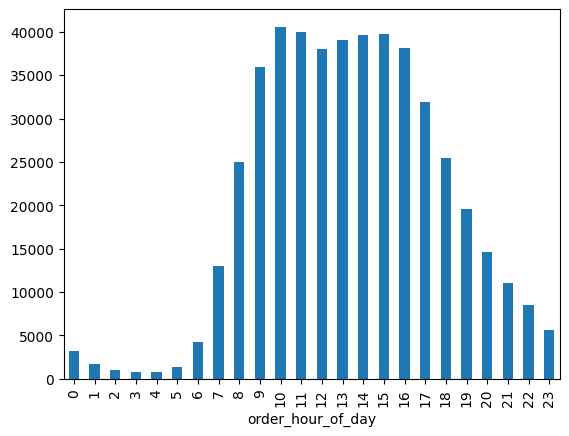

In [40]:
df_orders.groupby('order_hour_of_day')['order_id'].count().plot.bar()

Escreva suas conclusões aqui a hora que as pessoas mais fazem pedidos no dia é as 15h da tarde

### [A3] Em que dia da semana as pessoas compram produtos alimentícios?

<AxesSubplot:xlabel='order_dow'>

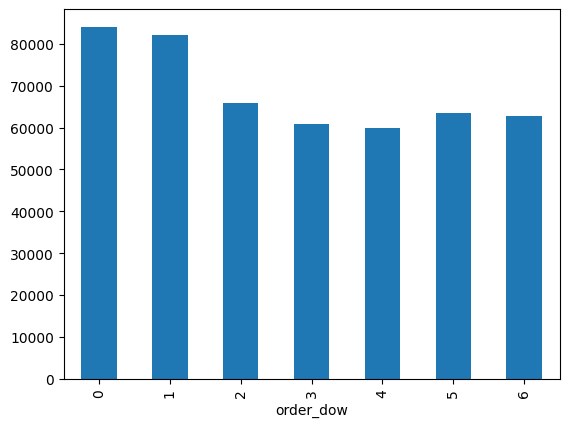

In [41]:
df_orders.groupby('order_dow')['order_id'].count().plot.bar()

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Seria possível adicionar os dias da semana no eixo X a partir do seguinte código: 
```python

from matplotlib import pyplot as plt

plot_data = df_orders_instacart.groupby('order_dow').user_id.count()
dias_da_semana = {
    0: 'Domingo',
    1: 'Segunda-feira',
    2: 'Terça-feira',
    3: 'Quarta-feira',
    4: 'Quinta-feira',
    5: 'Sexta-feira',
    6: 'Sábado'
}
df_orders_instacart['nome_dia'] = df_orders_instacart['order_dow'].map(dias_da_semana)
compras_por_dia = df_orders_instacart['nome_dia'].value_counts()
compras_por_dia = compras_por_dia.reindex(['Domingo', 'Segunda-feira', 'Terça-feira', 'Quarta-feira', 'Quinta-feira', 'Sexta-feira', 'Sábado'])
fig, ax = plt.subplots(figsize=(10, 8))
ax.bar(compras_por_dia.index, compras_por_dia.values, color='skyblue')
ax.set_title('Dia da semana que as pessoas fazem compras')
ax.set_xlabel('Pedidos por dia')
ax.set_ylabel('Quantidade de compras')

plt.show()
```

</div>

Escreva suas conclusões aqui

### [A4] Quanto tempo as pessoas esperam até fazer outro pedido?

Escreva suas conclusões aqui

(0.0, 30.0)

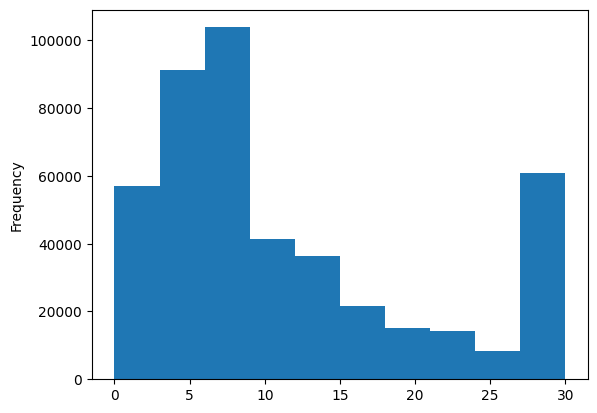

In [42]:
df_orders['days_since_prior_order'].plot.hist()
df_orders['days_since_prior_order'].min(), df_orders['days_since_prior_order'].max()

# [B] Médio (é necessário concluir tudo para passar)

1.	Há alguma diferença nas distribuições de `'order_hour_of_day'` nas quartas e sábados? Construa gráficos de barras para ambos os dias no mesmo gráfico e descreva as diferenças que você notou.
2.	Construa um gráfico de distribuição para o número de pedidos que os clientes fazem (ou seja, quantos clientes fizeram apenas 1 pedido, quantos fizeram apenas 2, quantos apenas 3, etc.)
3.	Quais são os 20 produtos comprados com mais frequência? Exiba os IDs e nomes.


### [B1] Diferenças nas quartas e sábados em `'order_hour_of_day'`. Crie gráficos de barras para ambos os dias e descreva as diferenças.

<AxesSubplot:>

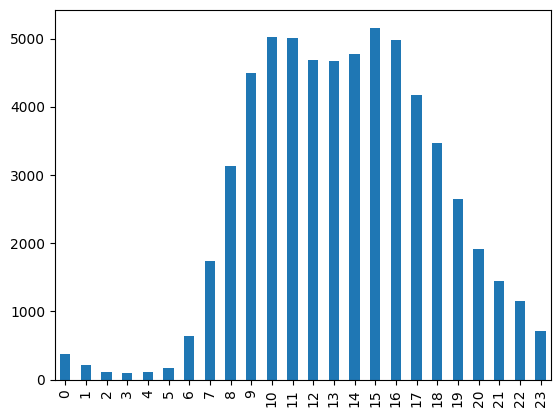

In [43]:
df_orders[df_orders['order_dow']== 3]['order_hour_of_day'].value_counts().sort_index().plot.bar()


<AxesSubplot:>

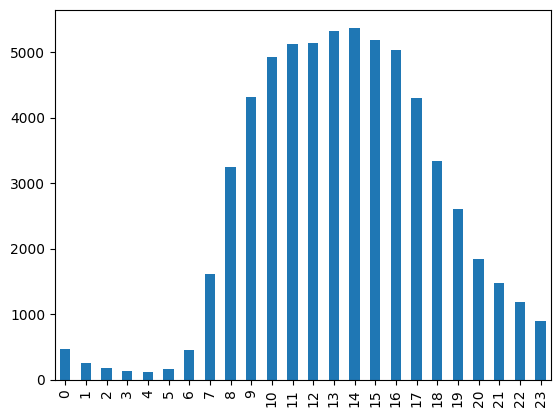

In [44]:
df_orders[df_orders['order_dow']== 6]['order_hour_of_day'].value_counts().sort_index().plot.bar()


Escreva suas conclusões aqui

### [B2] Qual é a distribuição do número de pedidos por cliente?

<AxesSubplot:ylabel='Frequency'>

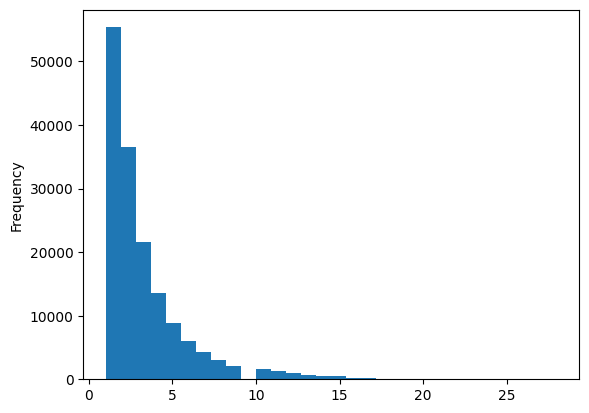

In [45]:
df_orders.groupby(['user_id'])['order_id'].count().plot.hist(bins=30)

<AxesSubplot:>

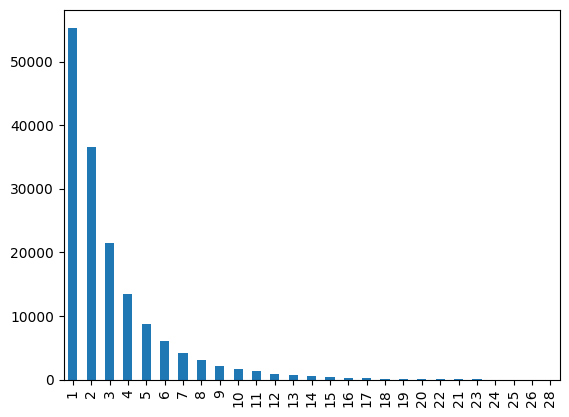

In [46]:
df_orders.groupby(['user_id'])['order_id'].count().value_counts().plot.bar()

Escreva suas conclusões aqui

### [B3] Quais são os 20 produtos mais populares? Exiba os IDs e nomes.

In [47]:
df_ranking = df_order_products['product_id'].value_counts().head(20).reset_index()
df_ranking.columns = ['product_id', 'ctn']


pd.merge(df_ranking, df_products[['product_name', 'product_id']], on= 'product_id')

,product_id,ctn,product_name
0,24852,66050,banana
1,13176,53297,bag of organic bananas
2,21137,37039,organic strawberries
3,21903,33971,organic baby spinach
4,47209,29773,organic hass avocado
5,47766,24689,organic avocado
6,47626,21495,large lemon
7,16797,20018,strawberries
8,26209,19690,limes
9,27845,19600,organic whole milk


In [48]:
#Codigo ajustado pela revisora - faltava o () no reset_index() 
df_ranking = df_order_products['product_id'].value_counts().head(20).reset_index()
df_ranking.columns = ['product_id', 'ctn']


pd.merge(df_ranking, df_products[['product_name', 'product_id']], on= 'product_id')

,product_id,ctn,product_name
0,24852,66050,banana
1,13176,53297,bag of organic bananas
2,21137,37039,organic strawberries
3,21903,33971,organic baby spinach
4,47209,29773,organic hass avocado
5,47766,24689,organic avocado
6,47626,21495,large lemon
7,16797,20018,strawberries
8,26209,19690,limes
9,27845,19600,organic whole milk


### [C1] Quantos itens as pessoas normalmente compram em um pedido? Como fica a distribuição?

In [49]:
df_order_products.groupby(['order_id'])['product_id'].count().mean()

10.098983215049127

<AxesSubplot:ylabel='Frequency'>

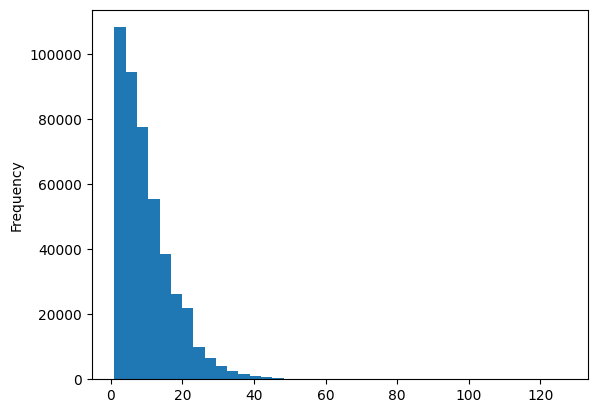

In [50]:
df_order_products.groupby(['order_id'])['product_id'].count().plot.hist(bins=40)

### [C2] Quais são os 20 principais itens incluídos com mais frequência em pedidos repetidos? Exiba os IDs e nomes.

In [52]:
df_ranking = df_order_products[df_order_products['reordered']==1]['product_id'].value_counts().head(20).reset_index()
df_ranking.columns = ['product_id', 'ctn']


pd.merge(df_ranking, df_products[['product_name', 'product_id']], on= 'product_id')

,product_id,ctn,product_name
0,24852,55763,banana
1,13176,44450,bag of organic bananas
2,21137,28639,organic strawberries
3,21903,26233,organic baby spinach
4,47209,23629,organic hass avocado
5,47766,18743,organic avocado
6,27845,16251,organic whole milk
7,47626,15044,large lemon
8,27966,14748,organic raspberries
9,16797,13945,strawberries


In [ ]:
#Codigo ajustado pela revisora 
df_ranking = df_order_products[df_order_products['reordered']==1]['product_id'].value_counts().head(20).reset_index()
df_ranking.columns = ['product_id', 'ctn']


pd.merge(df_ranking, df_products[['product_name', 'product_id']], on= 'product_id')

# Conclusões
Durante o processo de limpeza dos dados, identificamos e corrigimos problemas como:

Linhas duplicadas que poderiam comprometer a análise de frequência de pedidos.

Presença de espaços em branco que afetavam a consistência e integridade dos dados em algumas colunas.

Essa etapa foi essencial para garantir que as análises seguintes fossem baseadas em dados confiáveis.
O maior volume de pedidos ocorre às 15h, indicando que a tarde é o período mais ativo para compras.
A maioria dos pedidos ocorre aos domingos e segundas-feiras.

Isso pode indicar um comportamento de reabastecimento no início da semana.

O tempo de espera entre pedidos varia entre 0 e 30 dias.

Essa variação sugere perfis distintos de consumo — desde consumidores frequentes até mensais.
O comportamento de compra muda entre dias úteis e finais de semana.
Itens básicos de consumo diário tendem a ser incluídos frequentemente em pedidos recorrentes.